# **DATA EXPLORATION**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

warnings.filterwarnings('ignore')

In [ ]:
# Import file
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# Load data
data = pd.read_csv('diabetes.csv')
data.head(3)


,Age_at_Exam,sBP,sBP_Date,BMI,BMI_Date,LDL,LDL_Date,HDL,HDL_Date,A1c,...,leastO(A1c_Date),leastO(DM_OnsetDate),leastO(FBS_Date),LeastOfAll,A1C_BEF_DM,FBS_BEF_DM,Patient_ID,DM_Onset_Revised,DM_Onset_Revised_1YrPrior,DIABETES
0,65.0,126.0,2013-06-11 00:00:00,31.0,2013-06-11 00:00:00,1.7,2013-06-14 00:00:00,1.1,2013-06-14 00:00:00,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,4.001000e+15,NaN,NaN,No
1,62.0,135.0,2014-06-19 00:00:00,25.8,2014-10-17 00:00:00,2.5,2014-05-28 00:00:00,1.4,2014-05-28 00:00:00,5.8,...,NaN,NaN,NaN,NaN,NaN,NaN,4.001000e+15,NaN,NaN,No
2,63.0,133.0,2012-07-31 00:00:00,30.9,2011-12-01 00:00:00,1.7,2012-06-01 00:00:00,NaN,NaN,6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,1.001000e+15,NaN,NaN,No


In [ ]:
# Checking the data types
data.dtypes

Age_at_Exam                                float64
sBP                                        float64
sBP_Date                                    object
BMI                                        float64
BMI_Date                                    object
LDL                                        float64
LDL_Date                                    object
HDL                                        float64
HDL_Date                                    object
A1c                                        float64
A1c_Date                                    object
TG                                         float64
TG_Date                                     object
FBS                                        float64
FBS_Date                                    object
FBS>DM                                     float64
Total_Cholesterol                          float64
Total_Cholesterol_Lab_Date                  object
Diabetes                                   float64
DM_OnsetDate                   

In [ ]:
# Remove rows with duplicate values in 'Patient_ID'
data = data.drop_duplicates(subset=['Patient_ID'], keep='last')

**Checking if values fall within acceptable value ranges for continuous features, and removing observations that are outside the acceptable range**

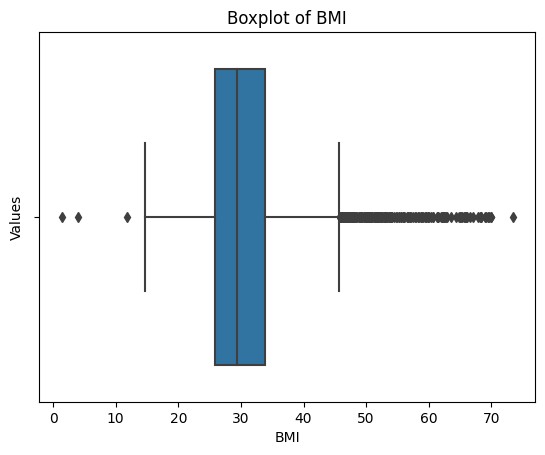

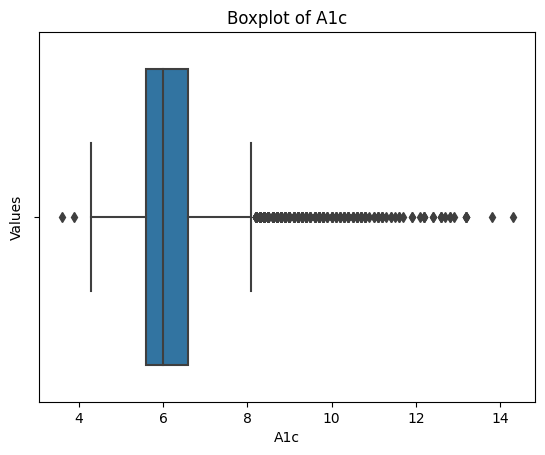

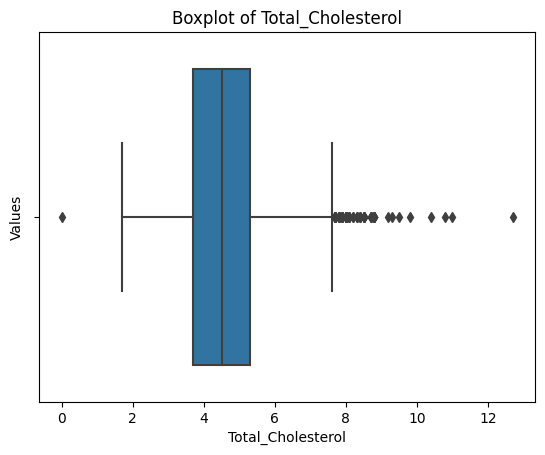

In [ ]:
# Specify columns to plot
columns_to_plot = ['BMI', 'A1c', 'Total_Cholesterol']

# Create boxplot
for column in columns_to_plot:
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Values')
    plt.show()


In [ ]:
# Boxplot shows that there are some data values outside acceptable ranges for BMI and A1c. Drop those observations
data = data[data.BMI > 10]
data = data[data.BMI < 60]
data = data[data.A1c > 3]
data = data[data.A1c < 17.8]

**Checking for and handling missing data**

In [ ]:
# Checking for missing data, by counting the number of missing values in each column
missing_value_counts = data.isnull().sum()
missing_value_counts

Age_at_Exam                                   0
sBP                                           4
sBP_Date                                      0
BMI                                           0
BMI_Date                                      0
LDL                                          48
LDL_Date                                      0
HDL                                          59
HDL_Date                                     52
A1c                                           0
A1c_Date                                      0
TG                                           49
TG_Date                                      39
FBS                                           0
FBS_Date                                      0
FBS>DM                                        0
Total_Cholesterol                           172
Total_Cholesterol_Lab_Date                  163
Diabetes                                      0
DM_OnsetDate                               4014
Depression                              



---


Our conceptual model based on prior literature search is to use HTN, BMI, A1c,total cholesterol, and sex as our features.

After checking for missing data, we see that total cholesterol has 172 missing.


---



Summary for Rows without Missing Data:
       Age_at_Exam          sBP          BMI          LDL          HDL  \
count  7801.000000  7797.000000  7801.000000  7763.000000  7753.000000   
mean     62.757211   130.303450    30.240533     2.576246     1.329988   
std      13.291940    16.991253     6.387016     0.958927     0.408074   
min      18.000000    60.000000    11.800000     0.100000     0.200000   
25%      54.000000   120.000000    25.800000     1.900000     1.000000   
50%      63.000000   130.000000    29.300000     2.500000     1.300000   
75%      73.000000   140.000000    33.700000     3.200000     1.600000   
max      90.000000   229.000000    59.900000     8.600000     4.000000   

               A1c           TG          FBS       FBS>DM  Total_Cholesterol  \
count  7801.000000  7764.000000  7801.000000  7801.000000        7801.000000   
mean      6.248250     1.559789     6.281425     0.919113           4.599449   
std       0.957766     1.046493     1.742004     0.272

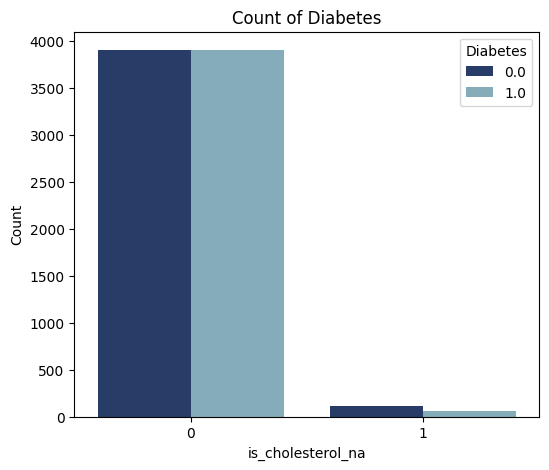

is_cholesterol_na
0    7801
1     172
Name: Diabetes, dtype: int64


In [ ]:
# Checking the type of missing data (MAR, MCAR, or MNAR)

# Calculate descriptive statistics for rows with missing data and rows without missing data
data_no_missing = data.dropna(subset=['Total_Cholesterol'])
summary_no_missing = data_no_missing.describe()

data_missing = data[data['Total_Cholesterol'].isna()]
summary_missing = data_missing.describe()

print("Summary for Rows without Missing Data:")
print(summary_no_missing)

print("Summary for Rows with Missing Data:")
print(summary_missing)


# Investigating the presence of missing values in the Total_Cholesterol column
# Create a binary indicator column 'is_cholesterol_na' to represent missing values in the 'total cholesterol' column
data['is_cholesterol_na'] = data['Total_Cholesterol'].isna().astype(int)

# Convert the 'Class/ASD' column to string data type
#data['Diabetes'] = data['Diabetes'].astype(str)

# Define a list of colors for the countplot
colors = ['#1c3a73', '#7cb1c2']

# Create a grouped bar chart using seaborn's countplot function with specified colors
plt.figure(figsize=(6, 5))
sns.countplot(data=data, x='is_cholesterol_na', hue='Diabetes', palette=colors)

# Set labels and title for the plot
plt.xlabel('is_cholesterol_na')
plt.ylabel('Count')
plt.title('Count of Diabetes')
plt.legend(title='Diabetes')
plt.show()

# Convert the 'Diabetes' column back to integer data type
#data['Diabetes'] = data['Diabetes'].astype(int)

# Calculate the mean of 'Class/ASD' grouped by 'is_ethnicit y_na' and print the result
print(data.groupby('is_cholesterol_na')['Diabetes'].count())

# Remove the 'is_ethnicity_na' column from the DataFrame
data.drop('is_cholesterol_na', axis=1, inplace=True)




---
In this analysis, it seems that there are no differences in descriptive statistics between observations with missing data and observations without missing data in the Total_Cholesterol column, and that the presence/absence of missing values does not influence the Diabetes output class. We suspect missing data to be MCAR and can later be imputed by the median values


---



**Exploring distribution of outcome variable**

In [ ]:
# Checking distribution of Diabetes (outcome) variable
# Compute the count of each class in the 'target' column
counts = data['Diabetes'].value_counts()
print(counts)

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Diabetes"',
    color_discrete_sequence=colors)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Diabetes'),
    title=dict(
        text='Distribution of Classes in "Diabetes"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)),
    width=500,
    height=350)

# Display the pie chart
fig.show()

0.0    4012
1.0    3961
Name: Diabetes, dtype: int64


**Exploring distribution of categorical features**

In [ ]:
# First, recoding sex to numerical first

# Define mapping from string value to numeric
mapping = {'Female': 0, 'Male': 1}

# Recode Sex column
data['Sex'] = data['Sex'].map(mapping)

In [ ]:
# Compute the count of each class in the HTN column
counts = data['HTN'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "HTN"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='HTN'
    ),
    title=dict(
        text='Distribution of Classes in "HTN"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()

# Compute the count of each class in the Sex column
counts = data['Sex'].value_counts()

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Sex"',
    color_discrete_sequence=colors
)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Sex'
    ),
    title=dict(
        text='Distribution of Classes in "Sex"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

# Display the pie chart
fig.show()


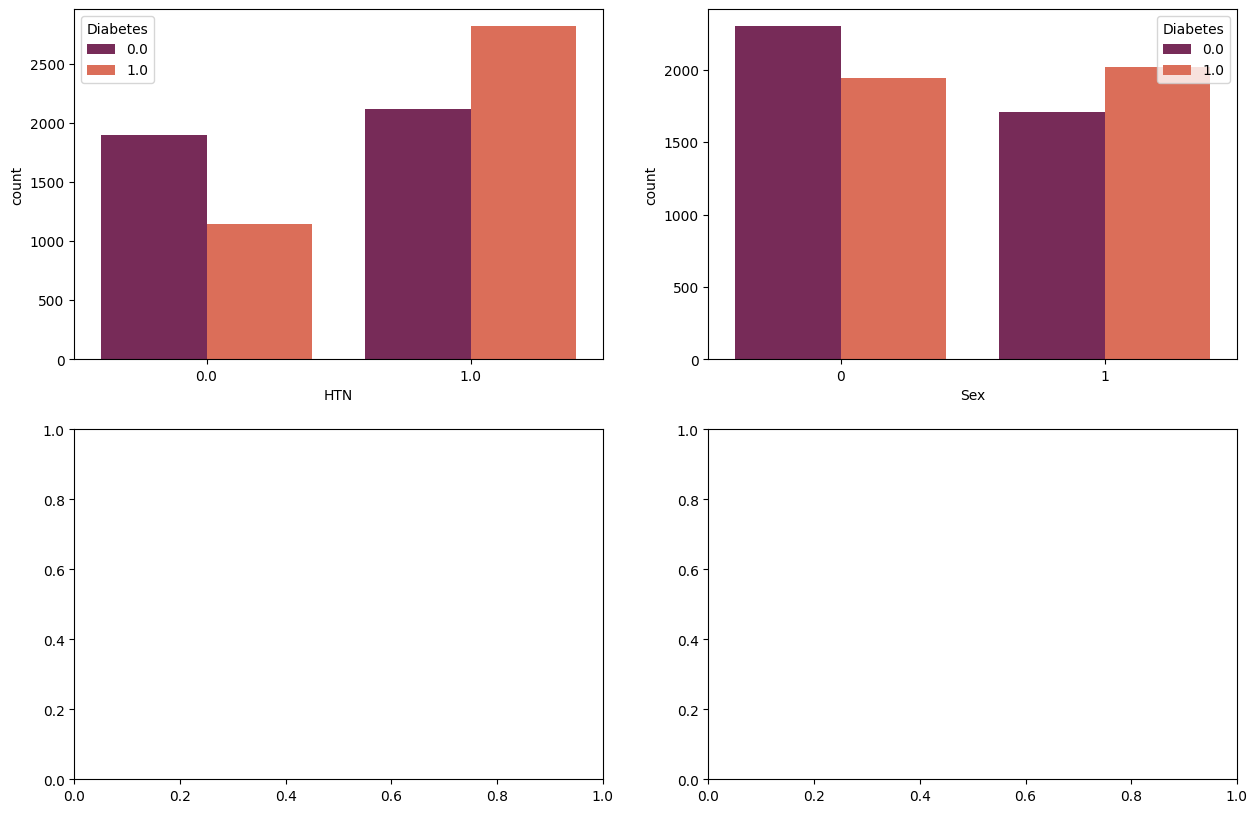

In [ ]:
# Checking the difference in the distribution of categorical features across two classes of the outcome

# Initialize a 3x3 grid of subplots
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

# Loop through each categorical column to plot its distribution
categorical_columns = ['HTN', 'Sex']
for i, column in enumerate(categorical_columns):
    # Determine the subplot's position based on the current index
    x = i // 3
    y = i % 3

    # Create a count plot for the current column
    # The hue parameter divides the counts based on the 'target' column,
    # allowing for a comparison between the classes.
    sns.countplot(data=data, x=column, hue='Diabetes', palette='rocket', ax=axs[x][y])

# Display all the plots
plt.show()

**Exploring distribution of continuous variables (non-scaled and scaled to check for outliers)**

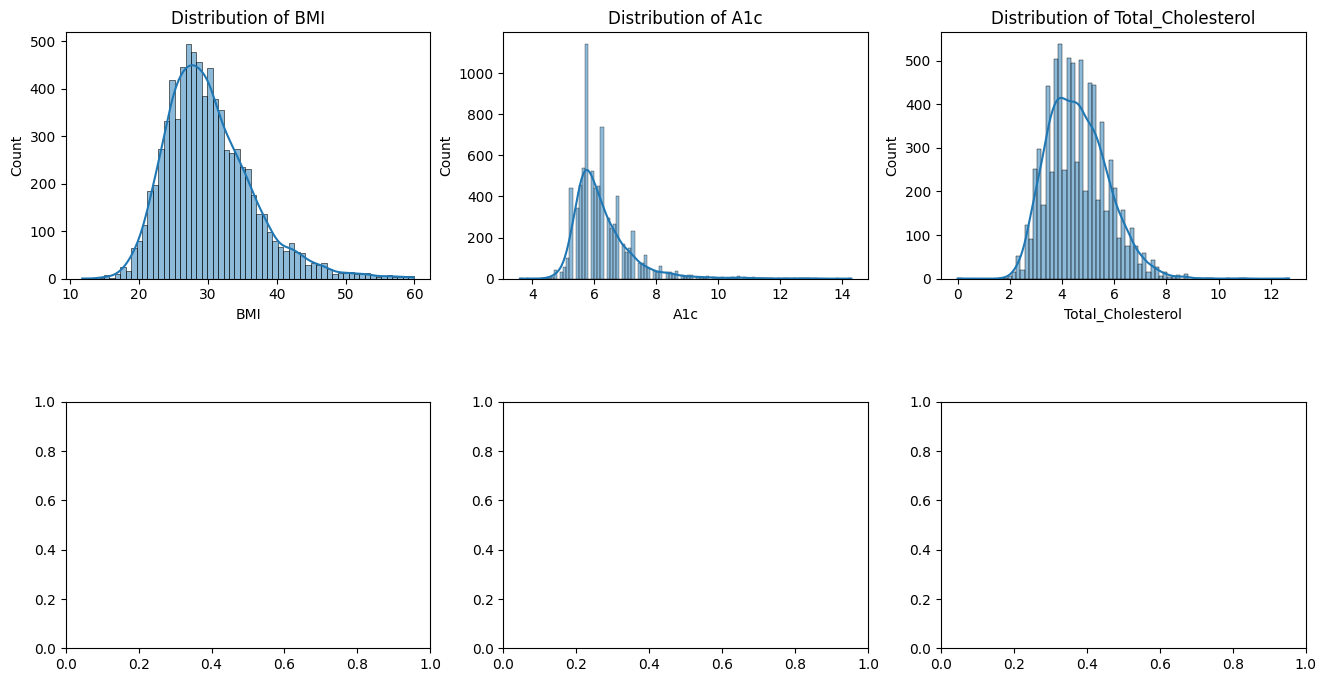

In [ ]:
# Creating histograms to visualize continuous variables
continuousVariables = ['BMI', 'A1c', 'Total_Cholesterol']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(continuousVariables):
    sns.histplot(data[continuousVariables[i]], ax=axes[i//4, i%4], kde=True)
    axes[i//4, i%4].set_title(f'Distribution of {col}')

plt.show()

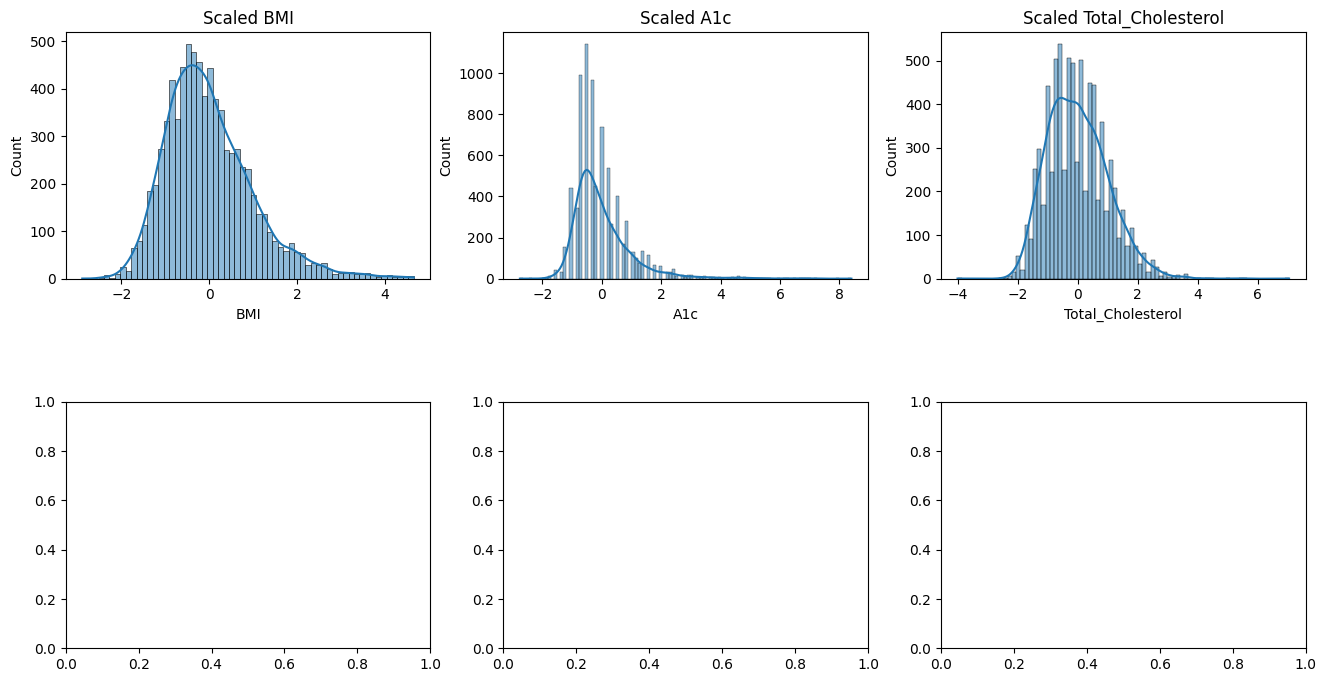

In [ ]:
#Converting BMI from string to float
data['BMI'] = pd.to_numeric(data['BMI'], errors='coerce')

scaler = StandardScaler()

# Scale the continuous variables
scaled_variables = scaler.fit_transform(data[continuousVariables])

# Create a DataFrame from the scaled variables using the column names from continuousVariables
scaled_df = pd.DataFrame(scaled_variables, columns=continuousVariables)

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

# Create histograms for scaled continuous variables
for i, col in enumerate(scaled_df.columns):
    sns.histplot(scaled_df[col], ax=axes[i//3, i%3], kde=True)
    axes[i//3, i%3].set_title(f'Scaled {col}')

plt.show()


In [ ]:
#Defining a Z-score threshold
zscore_threshold = 3

# Iterate through each continuous variable and print potential outliers
for variable_name in continuousVariables:
    data_column = data[variable_name]
    z_scores = (data_column - data_column.mean()) / data_column.std()
    outliers = data_column[abs(z_scores) > zscore_threshold]
    print(f"Outliers in '{variable_name}':")
    print(outliers)
    print("\n")

Outliers in 'BMI':
3       56.7
40      53.0
46      53.4
213     53.0
514     55.8
        ... 
9004    50.6
9196    50.9
9546    50.2
9803    52.1
9939    49.8
Name: BMI, Length: 99, dtype: float64


Outliers in 'A1c':
4898    10.0
4903    10.6
4917    12.7
4919    11.1
4932    10.6
        ... 
9712    11.2
9797     9.5
9814     9.4
9914    10.1
9980     9.9
Name: A1c, Length: 143, dtype: float64


Outliers in 'Total_Cholesterol':
412      8.8
745     12.7
938      8.8
1262     8.8
1282     8.1
1490     8.8
1743     8.3
1834     8.4
2102     9.5
2287     8.4
2440     8.5
2582     9.8
3084     8.3
3297    11.0
3711     8.7
5075     8.3
5342     9.3
5405     0.0
5838     8.1
5936     8.7
6111     8.5
6336    10.8
6459     8.5
6498     8.5
6523     8.2
6885     8.2
6963     8.8
7640     8.7
7867     8.5
8024     8.1
8051     8.8
8126     9.2
8525     8.1
8694    10.4
9352     8.7
9358     8.4
Name: Total_Cholesterol, dtype: float64






---


Because we have 99+143+36 (268) outliers, We will do a sensitivity analysis without those outliers later (running the final model without the outlier observations)


---



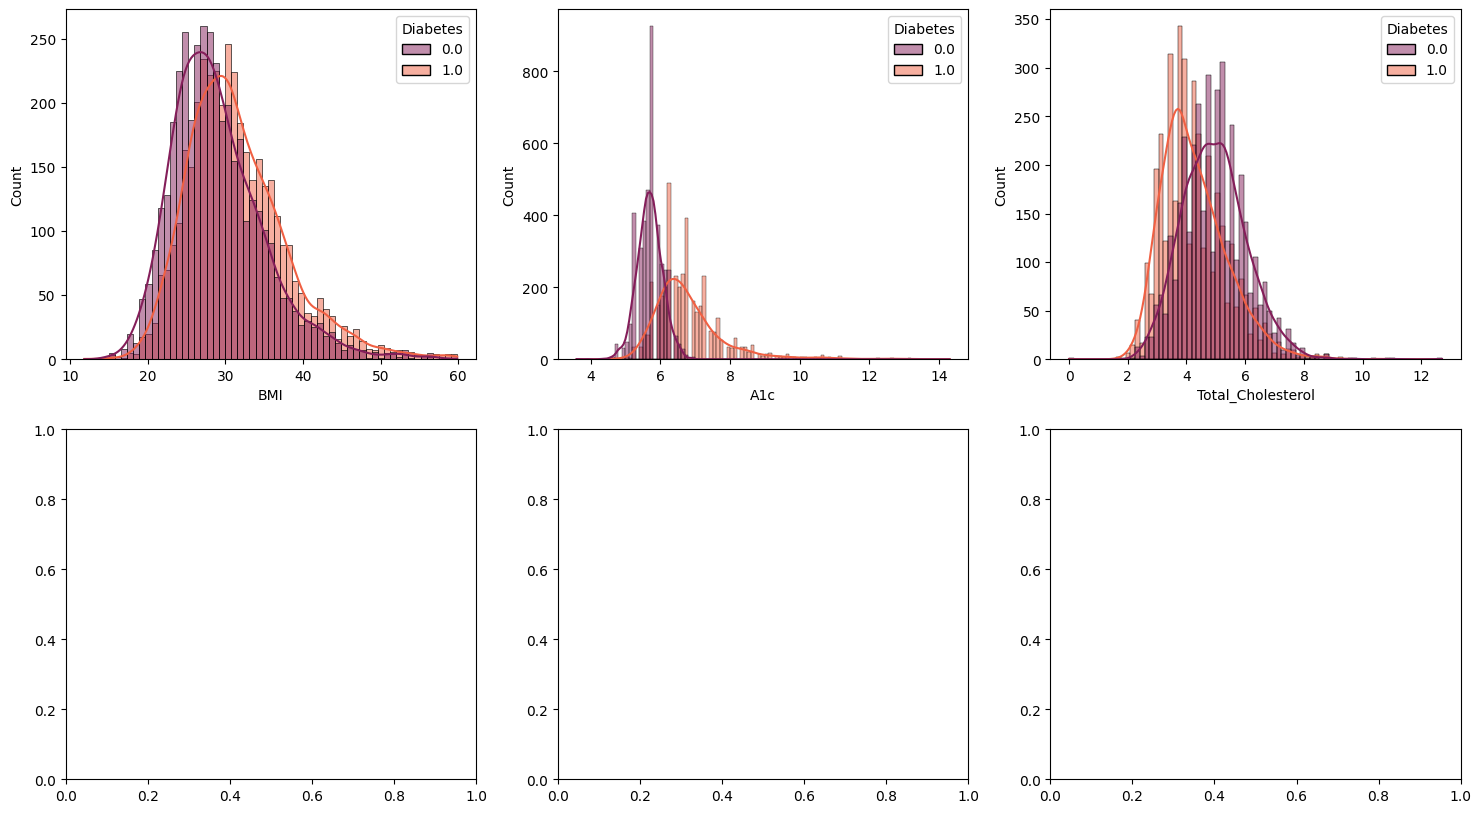

In [ ]:
# Checking the difference in the distribution of continuous features across two classes of the outcome

# Create a grid of subplots with 2 rows and 3 columns
fig, axs = plt.subplots(ncols=3, nrows=2, figsize=(18, 10))

# Create list of numerical columns
numerical_columns = ['BMI', 'A1c', 'Total_Cholesterol']

# Loop over each feature in numerical and multinomial lists
for i, column in enumerate(numerical_columns):
    # Calculate the position for the subplot; x is the row index and y is the column index
    x = i // 3
    y = i % 3

    # Plot a histogram of the feature split by the 'target' class
    # kde=True adds a Kernel Density Estimate plot to smooth the histogram, providing a clearer view of the data distribution
    sns.histplot(data, x=column, hue='Diabetes', kde=True, palette='rocket', ax=axs[x][y])

# Display all the subplots
plt.show()


**Examining multicollinearity of continuous features**

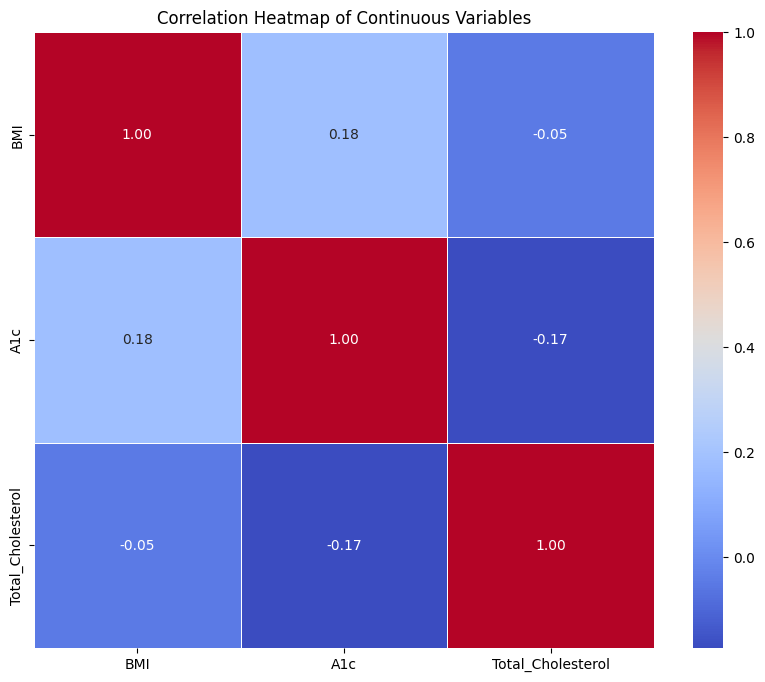

In [ ]:
continuousVariables = data[['BMI', 'A1c', 'Total_Cholesterol']]

correlationMatrix = continuousVariables.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Continuous Variables')
plt.show()



---


No multicollinearity seen in continuous features.


---



# **MODEL BUILDING**

In [ ]:
# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)

Building the model with all features

======== Training Set ==========
AUC :  0.8306533714249636
Accuracy :  0.8295703982439636
Confusion Matrix:
[[2735  635]
 [ 452 2556]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      3370
         1.0       0.80      0.85      0.82      3008

    accuracy                           0.83      6378
   macro avg       0.83      0.83      0.83      6378
weighted avg       0.83      0.83      0.83      6378

======== Test Set ==========
AUC :  0.8426876379690948
Accuracy :  0.8426332288401254
Confusion Matrix:
[[707 133]
 [118 637]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       840
         1.0       0.83      0.84      0.84       755

    accuracy                           0.84      1595
   macro avg       0.84      0.84      0.84      1595
weighted avg       0.84      0.84      0.84      1595



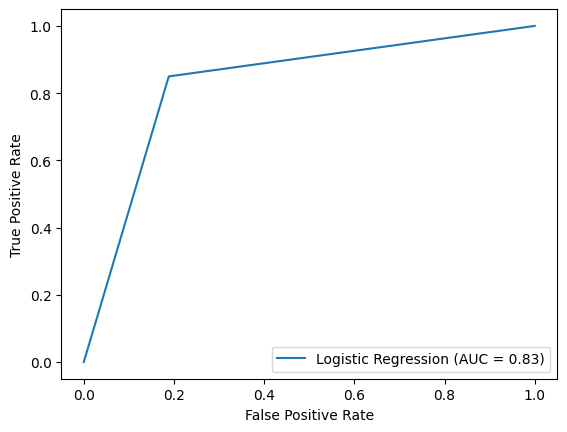

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Split the data into features and target variable
X = data.drop(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'Diabetes',	'DM_OnsetDate',	'Depression',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior',	'DIABETES'], axis=1)
y = data['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[['Total_Cholesterol']])

# Use median to fill the NaN values in both train and test sets
X_train['Total_Cholesterol'] = imputer.transform(X_train[['Total_Cholesterol']])
X_test['Total_Cholesterol'] = imputer.transform(X_test[['Total_Cholesterol']])

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
model1 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model1.fit(X_train, y_train)

# Make predictions on the test and training sets
y_pred_test = model1.predict(X_test)
y_pred_train = model1.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

After we have built our model with all the features, we will identify interactions by plotting box plots and scatter plots for various variables that might have a differing effect if stratified. The interactions we looked at are BMI and Sex, Cholesterol and Sex, Cholesterol and HTN, A1c and Cholesterol, and A1c and BMI.

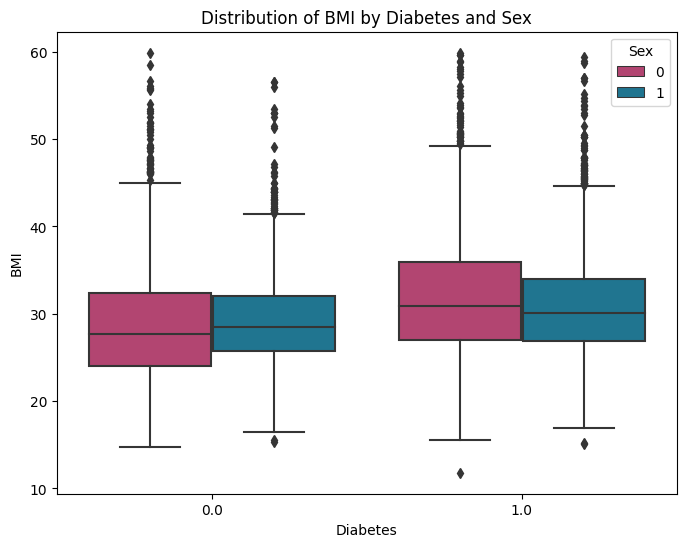

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#c4336d', '#0d7fa3']

# Create the boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Diabetes', y='BMI', hue='Sex', palette=custom_palette)

# Set labels and title
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('Distribution of BMI by Diabetes and Sex')

# Show the plot
plt.show()

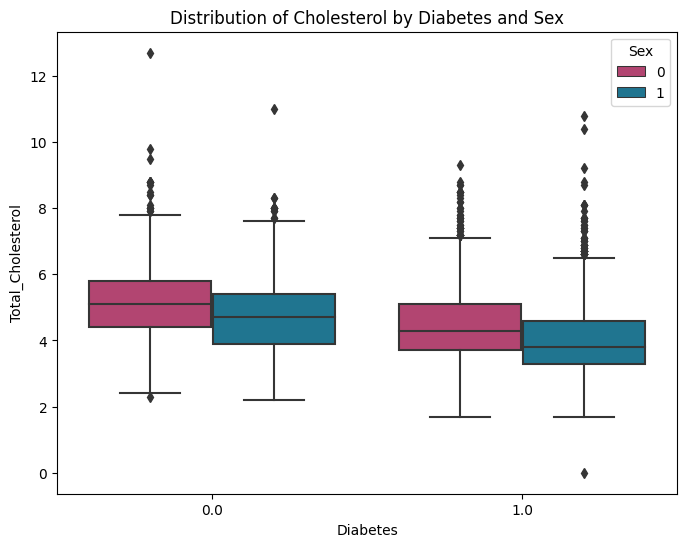

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#c4336d', '#0d7fa3']

# Create the boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Diabetes', y='Total_Cholesterol', hue='Sex', palette=custom_palette)

# Set labels and title
plt.xlabel('Diabetes')
plt.ylabel('Total_Cholesterol')
plt.title('Distribution of Cholesterol by Diabetes and Sex')

# Show the plot
plt.show()

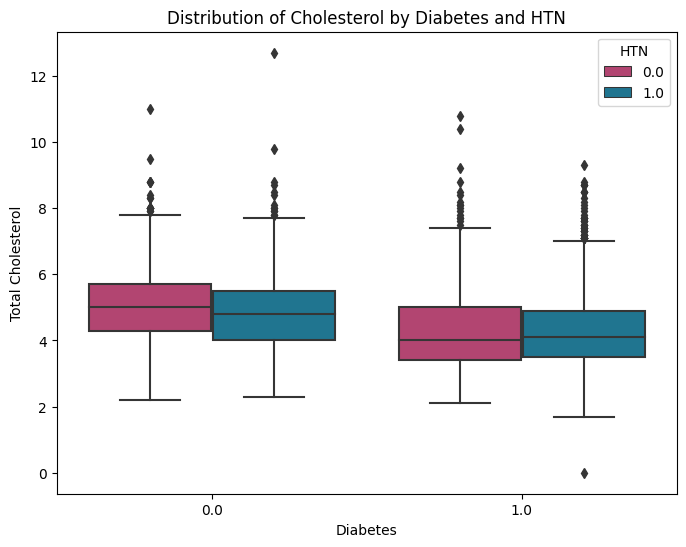

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#c4336d', '#0d7fa3']

# Create the boxplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Diabetes', y='Total_Cholesterol', hue='HTN', palette=custom_palette)

# Set labels and title
plt.xlabel('Diabetes')
plt.ylabel('Total Cholesterol')
plt.title('Distribution of Cholesterol by Diabetes and HTN')

# Show the plot
plt.show()

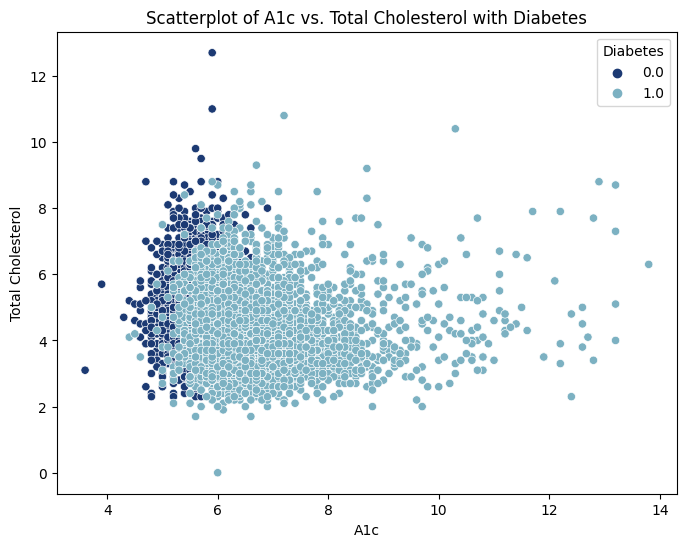

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#1c3a73', '#7cb1c2']

# Create the scatterplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='A1c', y='Total_Cholesterol', hue='Diabetes', palette=custom_palette)

# Set labels and title
plt.xlabel('A1c')
plt.ylabel('Total Cholesterol')
plt.title('Scatterplot of A1c vs. Total Cholesterol with Diabetes')

# Show the plot
plt.show()

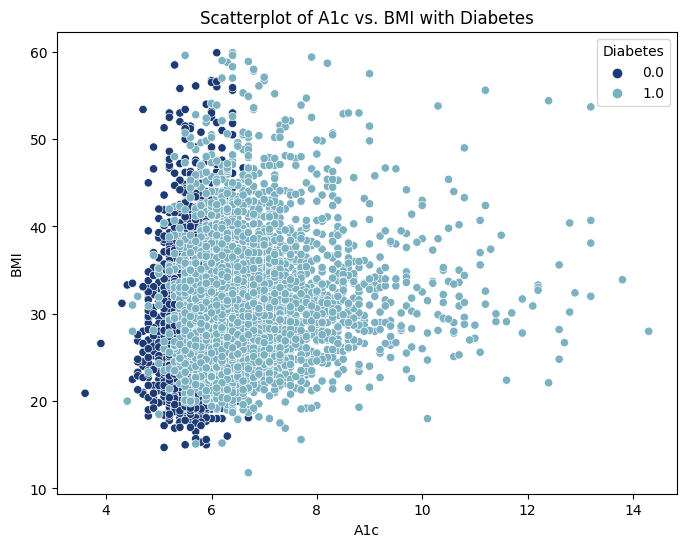

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a custom color palette
custom_palette = ['#1c3a73', '#7cb1c2']

# Create the scatterplot with the custom color palette
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='A1c', y='BMI', hue='Diabetes', palette=custom_palette)

# Set labels and title
plt.xlabel('A1c')
plt.ylabel('BMI')
plt.title('Scatterplot of A1c vs. BMI with Diabetes')

# Show the plot
plt.show()

After visualizing the interactions, we see that the interactions of A1c x Cholesterol and A1c x BMI are promising, as they show different trends  between diabetes classes. Now we incorporate interactions into the model


In [ ]:
# Create interaction features by multiplying 'A1c' and 'cholesterol' in the training and test sets
data['A1c_cholesterol']=data['A1c'] * data['Total_Cholesterol']
data['A1c_BMI']=data['A1c'] * data['BMI']

======== Training Set ==========
AUC :  0.8318753404500225
Accuracy :  0.8309814989024773
Confusion Matrix:
[[2731  622]
 [ 456 2569]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      3353
         1.0       0.81      0.85      0.83      3025

    accuracy                           0.83      6378
   macro avg       0.83      0.83      0.83      6378
weighted avg       0.83      0.83      0.83      6378

======== Test Set ==========
AUC :  0.8439451277199622
Accuracy :  0.8438871473354232
Confusion Matrix:
[[708 132]
 [117 638]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       840
         1.0       0.83      0.85      0.84       755

    accuracy                           0.84      1595
   macro avg       0.84      0.84      0.84      1595
weighted avg       0.84      0.84      0.84      1595



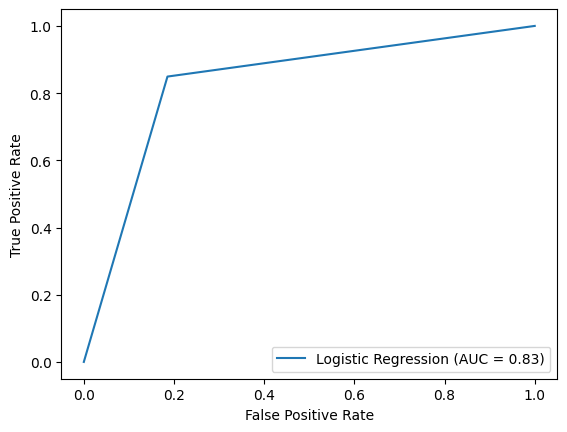

In [ ]:
# Split the data into features and target variable (with both interactions in)
X2 = data.drop(['Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'Diabetes',	'DM_OnsetDate',	'Depression',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior',	'DIABETES'], axis=1)
y2 = data['Diabetes']

# Split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train2[['Total_Cholesterol', 'A1c_cholesterol']])

# Use median to fill the NaN values in both train and test sets
X_train2[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_train2[['Total_Cholesterol', 'A1c_cholesterol']])
X_test2[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_test2[['Total_Cholesterol', 'A1c_cholesterol']])

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
model2 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model2.fit(X_train2, y_train2)

# Make predictions on the test and training sets
y_pred_test = model2.predict(X_test2)
y_pred_train = model2.predict(X_train2)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test2)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train2)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train2)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

======== Training Set ==========
AUC :  0.8312821385359951
Accuracy :  0.8308247099404202
Confusion Matrix:
[[2707  599]
 [ 480 2592]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      3306
         1.0       0.81      0.84      0.83      3072

    accuracy                           0.83      6378
   macro avg       0.83      0.83      0.83      6378
weighted avg       0.83      0.83      0.83      6378

======== Test Set ==========
AUC :  0.8449654751146894
Accuracy :  0.845141065830721
Confusion Matrix:
[[702 124]
 [123 646]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       826
         1.0       0.84      0.84      0.84       769

    accuracy                           0.85      1595
   macro avg       0.84      0.84      0.84      1595
weighted avg       0.85      0.85      0.85      1595



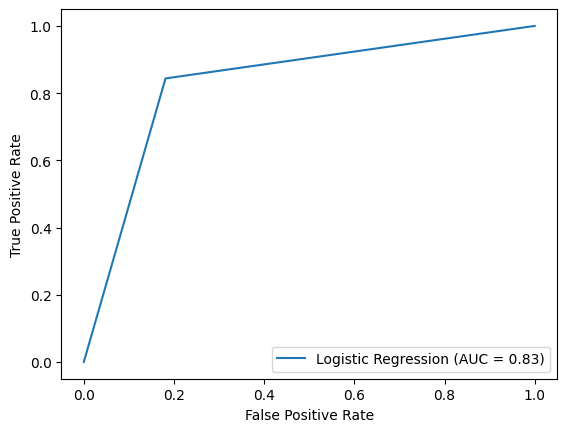

In [ ]:
# Split the data into features and target variable (without A1c_BMI)
X3 = data.drop(['A1c_BMI', 'Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'Diabetes',	'DM_OnsetDate',	'Depression',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior',	'DIABETES'], axis=1)
y3 = data['Diabetes']

# Split the data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train3[['Total_Cholesterol', 'A1c_cholesterol']])

# Use median to fill the NaN values in both train and test sets
X_train3[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_train3[['Total_Cholesterol', 'A1c_cholesterol']])
X_test3[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_test3[['Total_Cholesterol', 'A1c_cholesterol']])

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
model3 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model3.fit(X_train3, y_train3)

# Make predictions on the test and training sets
y_pred_test = model3.predict(X_test3)
y_pred_train = model3.predict(X_train3)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test3)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train3)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train3)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

======== Training Set ==========
AUC :  0.8326639850630203
Accuracy :  0.8314518657886485
Confusion Matrix:
[[2746  634]
 [ 441 2557]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      3380
         1.0       0.80      0.85      0.83      2998

    accuracy                           0.83      6378
   macro avg       0.83      0.83      0.83      6378
weighted avg       0.83      0.83      0.83      6378

======== Test Set ==========
AUC :  0.8443169108865847
Accuracy :  0.8438871473354232
Confusion Matrix:
[[714 138]
 [111 632]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.85       852
         1.0       0.82      0.85      0.84       743

    accuracy                           0.84      1595
   macro avg       0.84      0.84      0.84      1595
weighted avg       0.84      0.84      0.84      1595



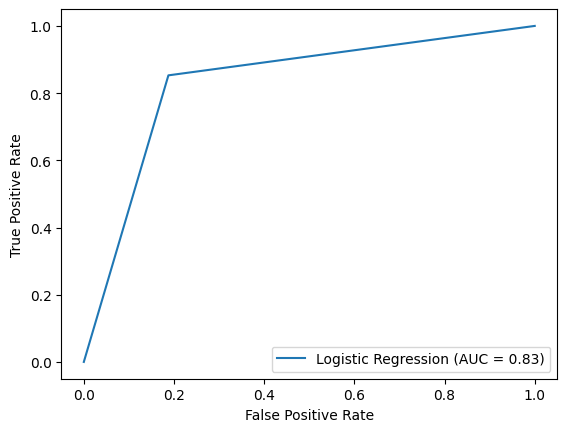

In [ ]:
# Split the data into features and target variable (without A1c_cholesterol)
X4 = data.drop(['A1c_cholesterol', 'Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'Diabetes',	'DM_OnsetDate',	'Depression',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior',	'DIABETES'], axis=1)
y4 = data['Diabetes']

# Split the data into training and testing sets
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train4[['Total_Cholesterol']])

# Use median to fill the NaN values in both train and test sets
X_train4[['Total_Cholesterol']] = imputer.transform(X_train4[['Total_Cholesterol']])
X_test4[['Total_Cholesterol']] = imputer.transform(X_test4[['Total_Cholesterol']])

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Training logistic regression model
model4 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model4.fit(X_train4, y_train4)

# Make predictions on the test and training sets
y_pred_test = model4.predict(X_test4)
y_pred_train = model4.predict(X_train4)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test4)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train4)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train4)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

We compare the performnnce for all of the models that we have created and pick the model with the best performance, which is the model with the A1c*cholesterol interaction.

Then from the dataset, we drop unneeded columns to get a clean dataframe with our selected features

In [ ]:
# Use the model to make predictions on the testing data
y_pred = model3.predict(X_test3)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[702 123]
 [124 646]]


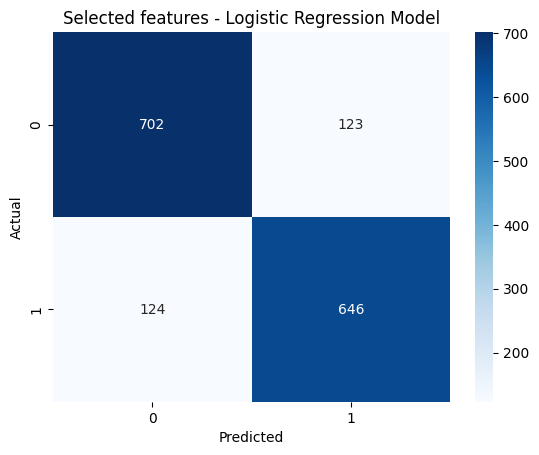

In [ ]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Selected features - Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [ ]:
#Creating a new dataset that includes the features we are moving forward with
columns_to_drop_diabetes = ['A1c_BMI', 'Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'DM_OnsetDate',	'Depression',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior',	'DIABETES']
datadiabetes = data.drop(columns=columns_to_drop_diabetes)

# **CROSS-VALIDATION ON SELECTED MODEL**

With our selected baseline model, we conduct KFold-CV

In [ ]:
# Import necessary libraries for feature selection and logistic regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np

# Cross-Validation setup using K-Fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_roc_aucs = []
all_predictions = []
all_true_labels = []

for train_index, test_index in kf.split(datadiabetes):
    train_datadiabetes, test_datadiabetes = datadiabetes.iloc[train_index], datadiabetes.iloc[test_index]

    X_train = train_datadiabetes.drop('Diabetes', axis=1)
    y_train = train_datadiabetes['Diabetes']

    X_test = test_datadiabetes.drop('Diabetes', axis=1)
    y_test = test_datadiabetes['Diabetes']

    # Conducting median imputation to fill the missing values
    imputer = SimpleImputer(strategy='median')
    imputer.fit(X_train[['Total_Cholesterol', 'A1c_cholesterol']])

    # Use median to fill the NaN values in both train and test sets
    X_train[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_train[['Total_Cholesterol', 'A1c_cholesterol']])
    X_test[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_test[['Total_Cholesterol', 'A1c_cholesterol']])

    # Normalization of the data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)

    # Training logistic regression model
    modelfinal = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
    modelfinal.fit(X_train_normalized, y_train)
    predictions = modelfinal.predict(X_test_normalized)

    #to get report
    all_predictions.extend(list(predictions))
    all_true_labels.extend(list(y_test))

    accuracy = accuracy_score(y_test, predictions)
    fold_accuracies.append(accuracy)
    roc_auc = roc_auc_score(y_test, predictions)
    fold_roc_aucs.append(roc_auc)
    print(f"Fold accuracy: {accuracy}")
    print(f"Fold ROC AUC: {roc_auc}")

print(classification_report(all_true_labels, all_predictions))
print(confusion_matrix(all_true_labels, all_predictions))
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Average ROC AUC: {np.mean(fold_roc_aucs):.4f} ± {np.std(fold_roc_aucs):.4f}")


# RFECV
rfecv = RFECV(
    estimator=modelfinal,
    step=1,
    cv=kf,
    scoring='roc_auc',
    min_features_to_select=1,)
rfecv.fit(X_train_normalized, y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")
selected_features = X_train.columns[rfecv.support_]
print(f"Selected features: {selected_features}")


Fold accuracy: 0.8470219435736677
Fold ROC AUC: 0.8464502164502165
Fold accuracy: 0.8181818181818182
Fold ROC AUC: 0.8186180452452251
Fold accuracy: 0.8163009404388715
Fold ROC AUC: 0.8164190251572329
Fold accuracy: 0.8312421580928482
Fold ROC AUC: 0.8303682697231085
Fold accuracy: 0.8557089084065245
Fold ROC AUC: 0.8558833022380715
              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84      4012
         1.0       0.85      0.81      0.83      3961

    accuracy                           0.83      7973
   macro avg       0.83      0.83      0.83      7973
weighted avg       0.83      0.83      0.83      7973

[[3448  564]
 [ 762 3199]]
Average Accuracy: 0.8337 ± 0.0156
Average ROC AUC: 0.8335 ± 0.0154
Optimal number of features: 6
Selected features: Index(['BMI', 'A1c', 'Total_Cholesterol', 'HTN', 'Sex', 'A1c_cholesterol'], dtype='object')


The accuracy and ROC AUC score for each individual fold are relatively similar, which indicates the model is not overfitting.

To know which features are relevant:

In [ ]:
#To show which features provide most value and importance we check columns and ranking
# which columns used and which wasn't
rfecv.support_
# features ranking low is better
rfecv.ranking_

array([1, 1, 1, 1, 1, 1])

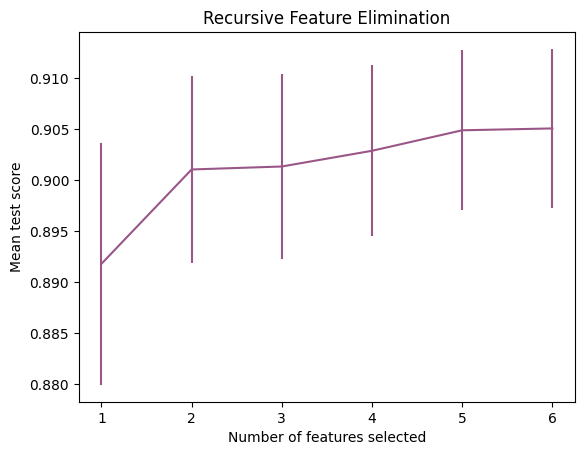

In [ ]:
# Calculate the number of different feature selections tested
n_scores = len(rfecv.cv_results_["mean_test_score"])

# Create a new figure for plotting
plt.figure()

# Set labels for the x and y axes
plt.xlabel("Number of features selected")
plt.ylabel("Mean test score")

# Plot the mean test scores with error bars
plt.errorbar(
    range(1, n_scores + 1),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
    color='#995687')

# Set the title for the plot
plt.title("Recursive Feature Elimination")

# Show the plot
plt.show()

Final model summary

In [ ]:
import statsmodels.api as sm

X5 = datadiabetes[['BMI', 'A1c', 'Total_Cholesterol', 'HTN', 'Sex', 'A1c_cholesterol']]
Y5 = datadiabetes['Diabetes']

# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
X5[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.fit_transform(X5[['Total_Cholesterol', 'A1c_cholesterol']])

# Add a constant term (intercept) to the input data
X5 = sm.add_constant(X5)

# Fit the logistic regression model
log_reg5 = sm.Logit(Y5, X5).fit()

# Get the summary report
summary5 = log_reg5.summary()
print(summary5)

Optimization terminated successfully.
         Current function value: 0.372941
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Diabetes   No. Observations:                 7973
Model:                          Logit   Df Residuals:                     7966
Method:                           MLE   Df Model:                            6
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                  0.4619
Time:                        00:44:05   Log-Likelihood:                -2973.5
converged:                       True   LL-Null:                       -5526.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -18.5916      1.824    -10.194      0.000     -22.166     -15.017
BMI     

# **ADDING KNN MODEL**

Please note we have to select features and adjust the test size and random state

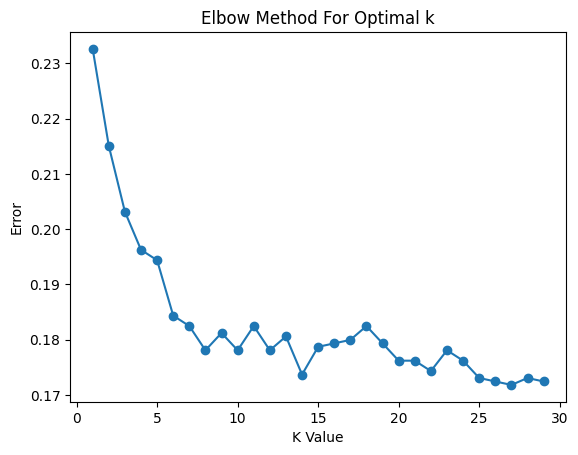

Optimal number of neighbors is: 27


In [ ]:
##import
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

#Add the features and target variable
X = datadiabetes.drop('Diabetes', axis=1)
y = datadiabetes['Diabetes']

#Split the data into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train[['Total_Cholesterol', 'A1c_cholesterol']])

# Use median to fill the NaN values in both train and test sets
X_train[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_train[['Total_Cholesterol', 'A1c_cholesterol']])
X_test[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_test[['Total_Cholesterol', 'A1c_cholesterol']])

#Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Determine Optimal K using the Elbow Method
k_range = range(1, 30)
errors = []

for k in k_range:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    errors.append(error)

plt.plot(k_range, errors, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.title('Elbow Method For Optimal k')
plt.show()

optimal_k = k_range[errors.index(min(errors))]
print(f"Optimal number of neighbors is: {optimal_k}")


Average cross-validation accuracy: 0.83
Confusion Matrix:
[[709 116]
 [170 600]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.86      0.83       825
         1.0       0.84      0.78      0.81       770

    accuracy                           0.82      1595
   macro avg       0.82      0.82      0.82      1595
weighted avg       0.82      0.82      0.82      1595



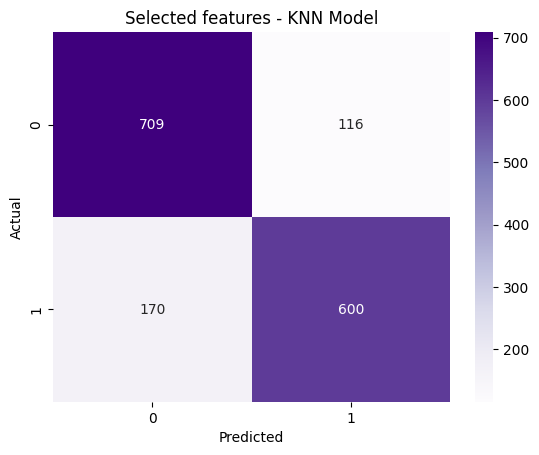

In [ ]:
#Model Training & Evaluation using Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model_knn = KNeighborsClassifier(n_neighbors=optimal_k)
    model_knn.fit(X_train_fold, y_train_fold)

    fold_scores.append(accuracy_score(y_val_fold, model_knn.predict(X_val_fold)))

avg_score = np.mean(fold_scores)
print(f"Average cross-validation accuracy: {avg_score:.2f}")


# Evaluate the model
# Initialize a KNN classifier with k=27 and metric='manhattan'
knn_optimal = KNeighborsClassifier(n_neighbors=27, metric='manhattan')

# Train the classifier on the training data
knn_optimal.fit(X_train, y_train.values.ravel())
y_pred = knn_optimal.predict(X_test)

conf_matrix2 = confusion_matrix(y_test, y_pred)
class_report2 = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix2)
print("\nClassification Report:")
print(class_report2)

# Visualizing confusion matrix
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Purples')
plt.title('Selected features - KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# **LOOKING AT WHETHER THE SAME PREDICTORS USED FROM OUR FINAL MODEL CAN PREDICT DEPRESSION**

Explore the target variable (Depression)

In [ ]:
#Drop unwanted columns from dataset
columns_to_drop_depression = ['A1c_BMI', 'Age_at_Exam', 'sBP', 'sBP_Date', 'BMI_Date', 'LDL', 'LDL_Date', 'HDL', 'HDL_Date', 'A1c_Date', 'TG',	'TG_Date',	'FBS',	'FBS_Date',	'FBS>DM',	'Total_Cholesterol_Lab_Date',	'DM_OnsetDate',	'Depression_OnsetDate',	'HTN_OnsetDate', 'OA',	'OA_OnsetDate', 'COPD',	'COPD_Date',	'Hypertension_Medications',	'Hypertension_Medications_First_Instance',	'Corticosteroids',	'Corticosteroids_first_instance',	'leastO(A1c_Date)',	'leastO(DM_OnsetDate)',	'leastO(FBS_Date)',	'LeastOfAll',	'A1C_BEF_DM',	'FBS_BEF_DM',	'Patient_ID',	'DM_Onset_Revised',	'DM_Onset_Revised_1YrPrior',	'DIABETES', 'Diabetes']
datadepression = data.drop(columns=columns_to_drop_depression)

In [ ]:
datadepression.dtypes

BMI                  float64
A1c                  float64
Total_Cholesterol    float64
Depression           float64
HTN                  float64
Sex                    int64
A1c_cholesterol      float64
dtype: object

In [ ]:
#Briefly explore distribution of depression before implementing the features to see predictability

# Compute the count of each class in the 'target' column
counts = datadepression['Depression'].value_counts()
print(counts)

# Define colors for the pie chart sections
colors = ['#a3416c', '#ebc898']

# Construct a pie chart with plotly
# 'names' are the class labels, and 'values' are the counts for each class
fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # creates a donut-styled pie chart
    title='Distribution of Classes in "Depression"',
    color_discrete_sequence=colors)

# Update the layout of the pie chart for better presentation and clarity
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Depression'),
    title=dict(
        text='Distribution of Classes in "Depression"',
        x=0.45,
        xanchor='center',
        y=0.95,
        yanchor='top',
        font=dict(size=16)),
    width=500,
    height=350)

# Display the pie chart
fig.show()


0.0    6292
1.0    1681
Name: Depression, dtype: int64


We notice an imbalance in the target variable, and so we have decided to upsample to balance the data. CV is conducted before fitting our model

======== Training Set ==========
AUC :  0.5933156923333073
Accuracy :  0.5933095096287473
Confusion Matrix:
[[2968 2028]
 [2069 3009]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59      4996
         1.0       0.60      0.59      0.59      5078

    accuracy                           0.59     10074
   macro avg       0.59      0.59      0.59     10074
weighted avg       0.59      0.59      0.59     10074

======== Test Set ==========
AUC :  0.5522725473117429
Accuracy :  0.5761755485893417
Confusion Matrix:
[[722 143]
 [533 197]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.58      0.83      0.68       865
         1.0       0.58      0.27      0.37       730

    accuracy                           0.58      1595
   macro avg       0.58      0.55      0.52      1595
weighted avg       0.58      0.58      0.54      1595



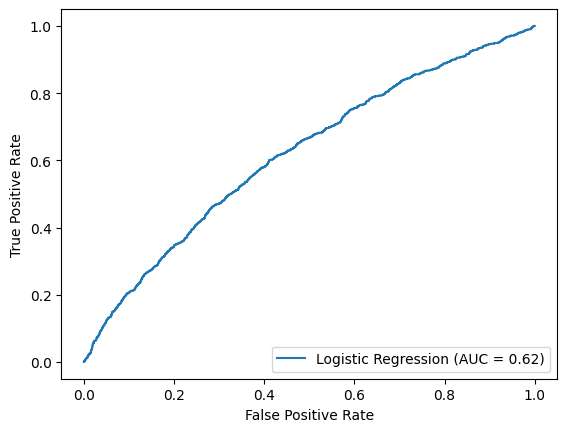

In [ ]:
# Split the data into features and target variable (without A1c_cholesterol)
X = datadepression.drop(['Depression'], axis=1)
y = datadepression['Depression']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train,y_train)

# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_resampled[['Total_Cholesterol', 'A1c_cholesterol']])

# Use median to fill the NaN values in both train and test sets
X_resampled[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_resampled[['Total_Cholesterol', 'A1c_cholesterol']])
X_test[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_test[['Total_Cholesterol', 'A1c_cholesterol']])

# Normalizing data
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Training logistic regression model
model7 = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
model7.fit(X_train_resampled_scaled, y_resampled)

# Make predictions on the test and training sets
y_pred_test = model7.predict(X_test_scaled)
y_pred_train = model7.predict(X_train_resampled_scaled)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_resampled)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set; since we upsampled we will set y_pred to show probabilities of dep diagnosis
y_pred_prob_train = model7.predict_proba(X_train_resampled_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_resampled, y_pred_prob_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
import numpy as np

# Cross-Validation setup using Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

fold_accuracies = []
fold_roc_aucs = []
all_predictions = []
all_true_labels = []

for train_index, test_index in skf.split(datadepression, datadepression['Depression']):
    train_datadepression, test_datadepression = datadepression.iloc[train_index], datadepression.iloc[test_index]

    X_train = train_datadepression.drop('Depression', axis=1)
    y_train = train_datadepression['Depression']

    X_test = test_datadepression.drop('Depression', axis=1)
    y_test = test_datadepression['Depression']

    # Oversampling
    from imblearn.over_sampling import RandomOverSampler
    ros = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train,y_train)

    # Conducting median imputation to fill the missing values
    imputer = SimpleImputer(strategy='median')
    imputer.fit(X_resampled[['Total_Cholesterol', 'A1c_cholesterol']])

    # Use median to fill the NaN values in both train and test sets
    X_resampled[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_resampled[['Total_Cholesterol', 'A1c_cholesterol']])
    X_test[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_test[['Total_Cholesterol', 'A1c_cholesterol']])

    # Normalization of the data
    scaler = StandardScaler()
    X_train_normalized = scaler.fit_transform(X_resampled)
    X_test_normalized = scaler.transform(X_test)

    # Initialize a Logistic Regression model
    modeldepression = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
    modeldepression.fit(X_train_normalized, y_resampled)
    predictions = modeldepression.predict(X_test_normalized)

    #to get report
    all_predictions.extend(list(predictions))
    all_true_labels.extend(list(y_test))

    accuracy = accuracy_score(y_test, predictions)
    fold_accuracies.append(accuracy)
    roc_auc = roc_auc_score(y_test, predictions)
    fold_roc_aucs.append(roc_auc)
    print(f"Fold accuracy: {accuracy}")
    print(f"Fold ROC AUC: {roc_auc}")

print(classification_report(all_true_labels, all_predictions))
print(confusion_matrix(all_true_labels, all_predictions))
print(f"Average Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Average ROC AUC: {np.mean(fold_roc_aucs):.4f} ± {np.std(fold_roc_aucs):.4f}")


Fold accuracy: 0.5554858934169279
Fold ROC AUC: 0.5613298536253262
Fold accuracy: 0.5880877742946709
Fold ROC AUC: 0.5983454839441734
Fold accuracy: 0.5774294670846395
Fold ROC AUC: 0.5811294362961321
Fold accuracy: 0.5696361355081556
Fold ROC AUC: 0.5844712885154062
Fold accuracy: 0.5765370138017566
Fold ROC AUC: 0.5812088348853055
              precision    recall  f1-score   support

         0.0       0.84      0.57      0.68      6292
         1.0       0.27      0.59      0.37      1681

    accuracy                           0.57      7973
   macro avg       0.55      0.58      0.52      7973
weighted avg       0.72      0.57      0.61      7973

[[3572 2720]
 [ 681 1000]]
Average Accuracy: 0.5734 ± 0.0107
Average ROC AUC: 0.5813 ± 0.0118


Confusion Matrix:
[[   0 1258]
 [   0  336]]


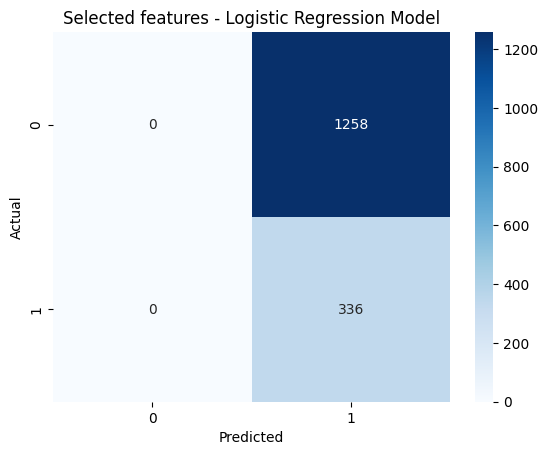

In [ ]:
# Use the model to make predictions on the testing data
y_pred = modeldepression.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Selected features - Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Summary of final model. Please keep in mind this does not include the upsampled data, this only fits the model based on what the dataset is

In [ ]:
X6=datadepression[['BMI', 'A1c', 'Sex', 'Total_Cholesterol', 'HTN', 'A1c_cholesterol']]
Y6 =datadepression['Depression']

# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
X6[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.fit_transform(X6[['Total_Cholesterol', 'A1c_cholesterol']])

# Summary od the model
X6 = sm.add_constant(X6)

#Fit model
log_reg6 = sm.Logit(Y6, X6).fit()

# Get summary report
summary6 = log_reg6.summary()
print(summary6)

Optimization terminated successfully.
         Current function value: 0.502607
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Depression   No. Observations:                 7973
Model:                          Logit   Df Residuals:                     7966
Method:                           MLE   Df Model:                            6
Date:                Tue, 31 Oct 2023   Pseudo R-squ.:                 0.02418
Time:                        00:44:56   Log-Likelihood:                -4007.3
converged:                       True   LL-Null:                       -4106.6
Covariance Type:            nonrobust   LLR p-value:                 3.737e-40
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6788      0.678     -2.477      0.013      -3.007      -0.350
BMI     

# **ADDING KNN WITH UPSAMPLED DATA**


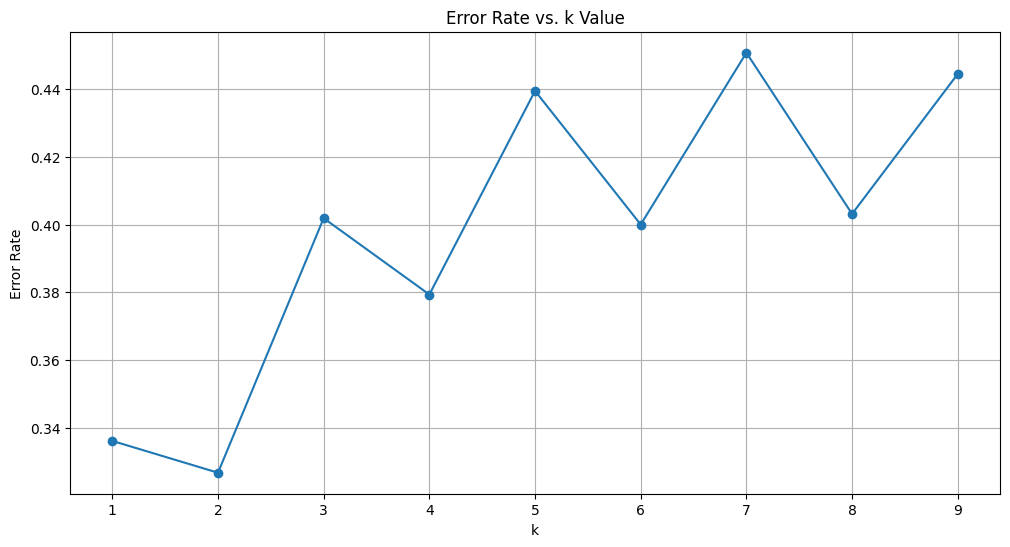

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Data Split
X8 = datadepression[['BMI', 'A1c', 'Total_Cholesterol', 'HTN', 'Sex', 'A1c_cholesterol']]
Y8 = datadepression['Depression']
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, Y8, test_size=0.2, random_state=42)

# Oversampling
ros = RandomOverSampler(random_state=42)
X_train8_resampled, y_train8_resampled = ros.fit_resample(X_train8, y_train8)

# Imputation
# Conducting median imputation to fill the missing values
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train8_resampled[['Total_Cholesterol', 'A1c_cholesterol']])
X_train8_resampled[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_train8_resampled[['Total_Cholesterol', 'A1c_cholesterol']])
X_test8[['Total_Cholesterol', 'A1c_cholesterol']] = imputer.transform(X_test8[['Total_Cholesterol', 'A1c_cholesterol']])

#  Normalizing data
scaler = StandardScaler()
X_train8_resampled_scaled = scaler.fit_transform(X_train8_resampled)
X_test8_scaled = scaler.transform(X_test8)

# Elbow method for KNN
k_values = range(1, 10)
errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train8_resampled_scaled, y_train8_resampled)
    y_pred8 = knn.predict(X_test8_scaled)
    error = 1 - accuracy_score(y_test8, y_pred8)
    errors.append(error)

plt.figure(figsize=(12, 6))
plt.plot(k_values, errors, marker='o')
plt.title('Error Rate vs. k Value')
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

# Choose the best K based on the Elbow method (optional, and could be based on domain knowledge)
optimal_k = k_values[errors.index(min(errors))]




K=2 has lowest errors

Average cross-validation accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79      1255
         1.0       0.23      0.23      0.23       340

    accuracy                           0.67      1595
   macro avg       0.51      0.51      0.51      1595
weighted avg       0.67      0.67      0.67      1595

Confusion Matrix:
[[995 260]
 [261  79]]


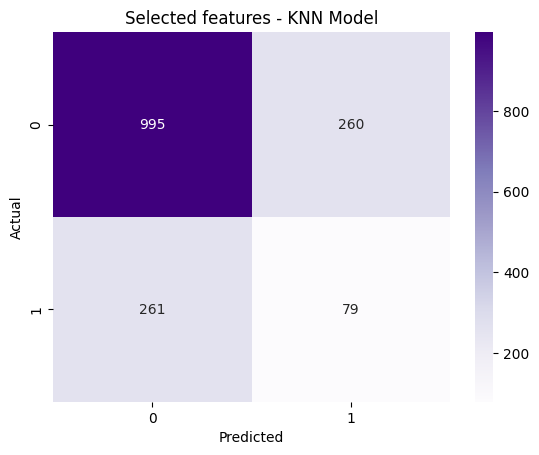

In [ ]:
#Model Training & Evaluation using Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []

for train_index, val_index in kf.split(X_train8_resampled_scaled):
    X_train_fold, X_val_fold = X_train8_resampled_scaled[train_index], X_train8_resampled_scaled[val_index]
    y_train_fold, y_val_fold = y_train8_resampled.iloc[train_index], y_train8_resampled.iloc[val_index]

    model_knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
    model_knn.fit(X_train_fold, y_train_fold)

    fold_scores.append(accuracy_score(y_val_fold, model_knn.predict(X_val_fold)))

avg_score = np.mean(fold_scores)
print(f"Average cross-validation accuracy: {avg_score:.2f}")

# Model Training with Optimal K
knn = KNeighborsClassifier(n_neighbors=2, metric='manhattan')
knn.fit(X_train8_resampled_scaled, y_train8_resampled)

# Model Evaluation
y_pred8 = knn.predict(X_test8_scaled)
print("Classification Report:")
print(classification_report(y_test8, y_pred8))

#Getting the confusion matrix
conf_matrix3 = confusion_matrix(y_test8, y_pred8)
print("Confusion Matrix:")
print(conf_matrix3)

# Visualizing confusion matrix
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Purples')
plt.title('Selected features - KNN Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



KNN model outperformed the LR model in predicting depression.

# THE END OF CODE